___

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

---

In this lab you'll try three clustering algorithms we've covered on 7 different datasets specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and data visualization heavy!


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

### 1. Load the datasets

Each of the seven datasets have 3 columns:

    x
    y
    label
    
Since they each only have two variables, they are easy to examine visually. The label column is the "true" label for the data that you will compare to the clusters the algorithms find.

In [2]:
flame = pd.read_csv('../../assets/data/flame.csv')
agg = pd.read_csv('../../assets/data/aggregation.csv')
comp = pd.read_csv('../../assets/data/compound.csv')
jain = pd.read_csv('../../assets/data/jain.csv')
path = pd.read_csv('../../assets/data/pathbased.csv')
r15 = pd.read_csv('../../assets/data/r15.csv')
spiral = pd.read_csv('../../assets/data/spiral.csv')

---

### 2. Plot each of the datasets with the true labels colored

The datasets have different numbers of unique labels, so you will need to figure out how many there are for each one and color the clusters accordingly (r15 has 15 different clusters).

In [3]:
def plot_clusters(df, title):
    fig, ax = plt.subplots(figsize=(5,5))
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))
    
    for label, color in zip(df.label.unique(), colors):
        X = df[df.label == label]
        ax.scatter(X.iloc[:,0], X.iloc[:,1], s=70, 
                   color=color, label=label, alpha=0.9)
        
    ax.set_title(title, fontsize=20)
    ax.legend(loc='lower right')
    
    plt.show()

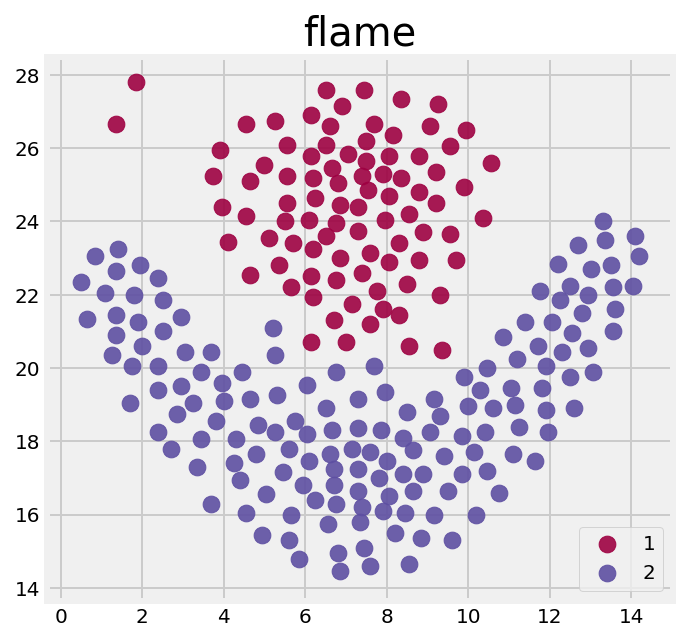

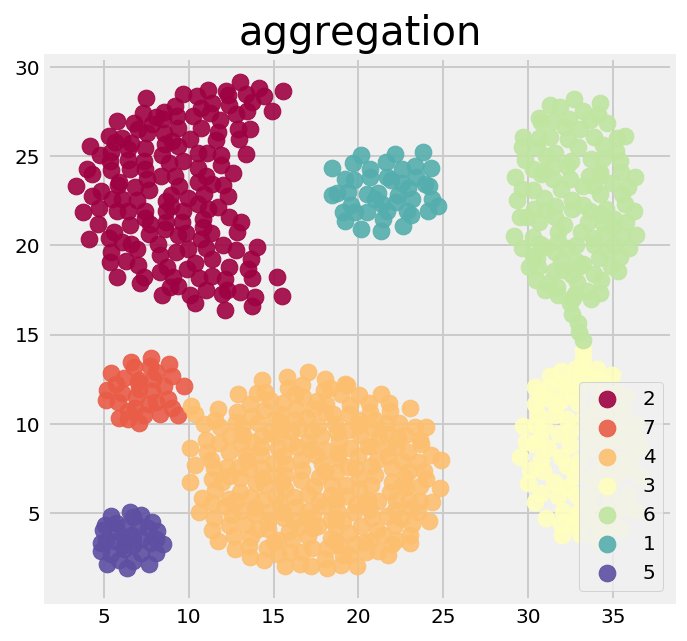

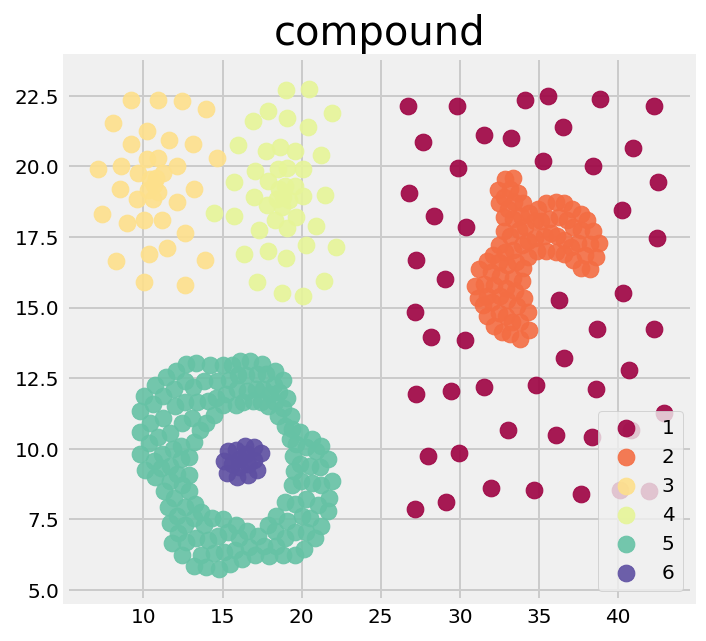

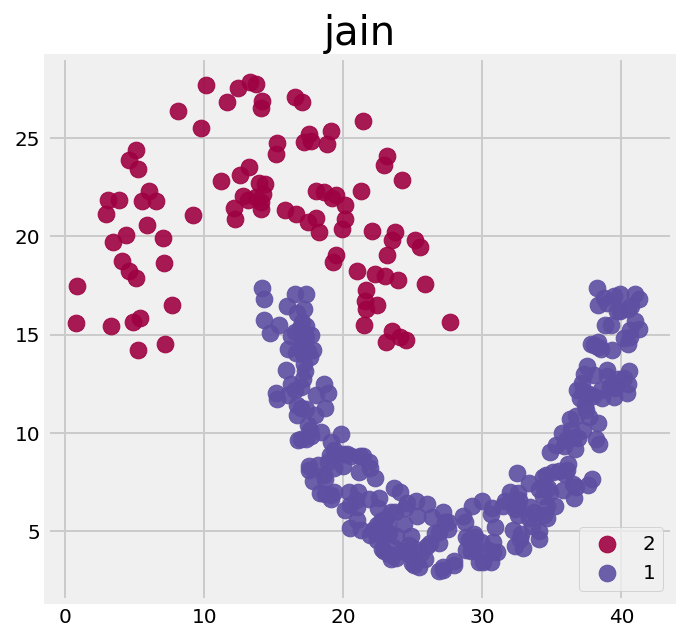

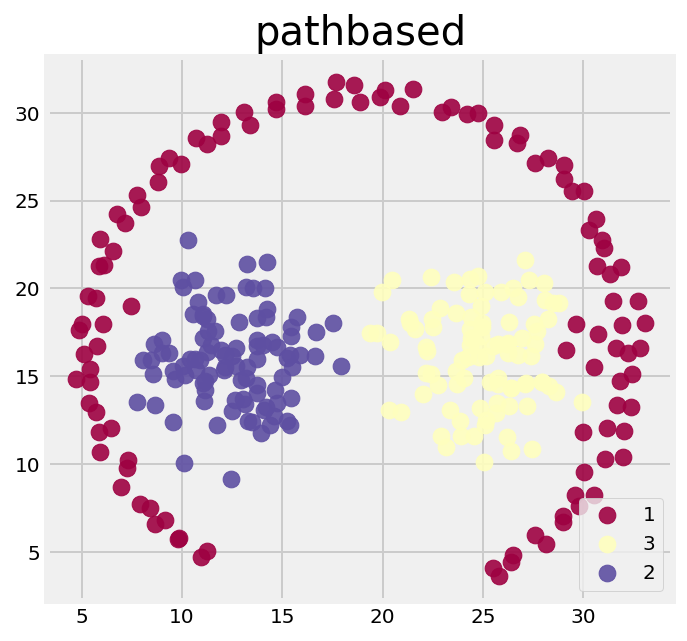

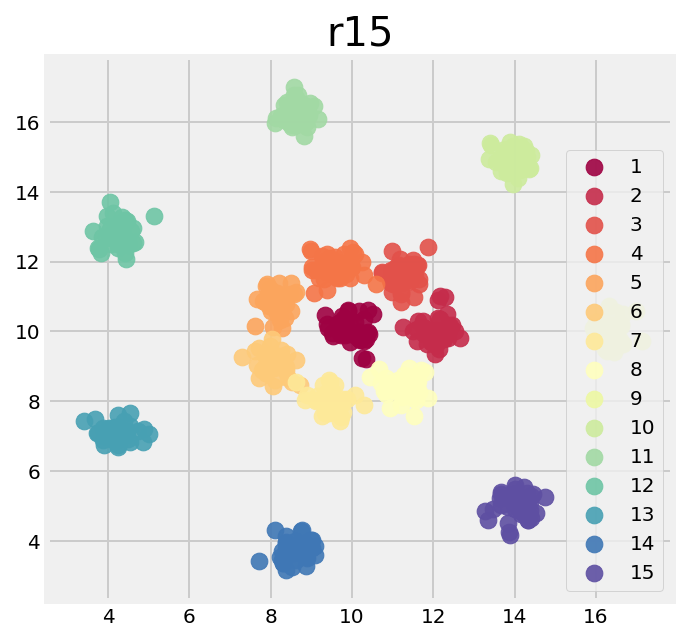

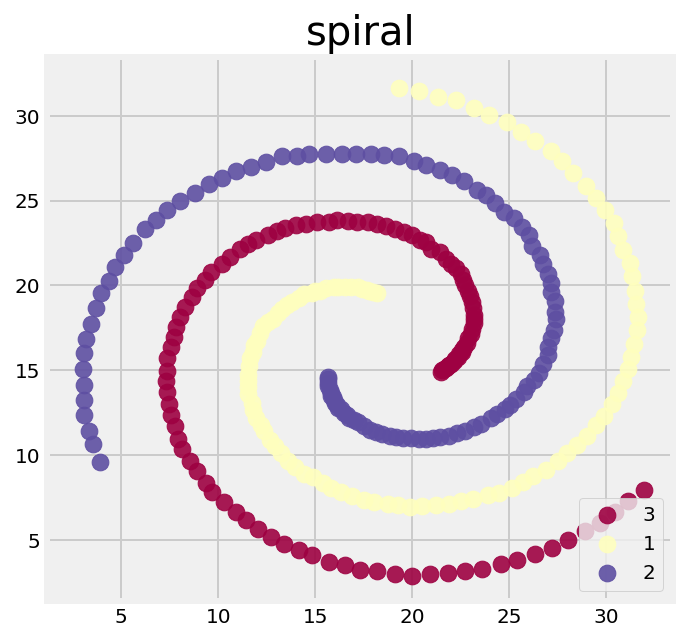

In [4]:
for title, df in zip(['flame','aggregation','compound','jain','pathbased','r15','spiral'],
                     [flame, agg, comp, jain, path, r15, spiral]):
    plot_clusters(df, title)

---

### 3. Plotting function or functions to compare the performance of three clustering algorithms

Below three clustering algorithms we have covered earlier in the class are loaded in.

    KMeans: k-means clustering
    AgglomerativeClustering: Hierarchical clustering (bottom-up)
    DBSCAN: density based clustering
    
This function will allow you to visually examine the effect of changing different parameters in the clustering algorithms. The parameters that you should explore are:

    KMeans:
        n_clusters
    AgglomerativeClustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        


In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [6]:
def plot_competing_algos(df, title, n_clusters_kmeans=3, n_clusters_agg=3,
                         dbscan_eps=3, dbscan_min_samples=5):
    
    fig, axarr = plt.subplots(1,4, figsize=(24,7))
    
    # TRUE:
    colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))
    
    for label, color in zip(df.label.unique(), colors):
        X_ = df[df.label == label]
        axarr[0].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[0].set_title(title+' '+'true', fontsize=20)
    axarr[0].legend(loc='lower right')
    
    # setup X:
    X = df.iloc[:, 0:2]
    
    # K-MEANS:
    kmeans = KMeans(n_clusters=n_clusters_kmeans)
    kmeans.fit(X.iloc[:, 0:2])
    
    X['kmeans_label'] = kmeans.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.kmeans_label.unique())))
    
    for label, color in zip(X.kmeans_label.unique(), colors):
        X_ = X[X.kmeans_label == label]
        axarr[1].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[1].set_title(title+' '+'kmeans', fontsize=20)
    axarr[1].legend(loc='lower right')
    
    
    # HIERARCHICAL/AGGLOMERATIVE:
    aggclust = AgglomerativeClustering(n_clusters=n_clusters_agg)
    aggclust.fit(X.iloc[:, 0:2])
    
    X['aggclust_label'] = aggclust.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.aggclust_label.unique())))
    
    for label, color in zip(X.aggclust_label.unique(), colors):
        X_ = X[X.aggclust_label == label]
        axarr[2].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[2].set_title(title+' '+'agglomerative', fontsize=20)
    axarr[2].legend(loc='lower right')
    
    
    # DBSCAN:
    dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
    dbscan.fit(X.iloc[:, 0:2])
    
    X['dbscan_label'] = dbscan.labels_
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(X.dbscan_label.unique())))
    
    for label, color in zip(X.dbscan_label.unique(), colors):
        X_ = X[X.dbscan_label == label]
        axarr[3].scatter(X_.iloc[:,0], X_.iloc[:,1], s=70, 
                         color=color, label=label, alpha=0.9)
        
    axarr[3].set_title(title+' '+'DBSCAN', fontsize=20)
    axarr[3].legend(loc='lower right')
    
    
    

## 4. Tinkering with clustering parameters

In the next sections, play around with the parameters for the clustering algorithms to see their effect and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

---

### 4.1 Find good parameters for the `flame` dataset

Which algorithm (visually) performs best?

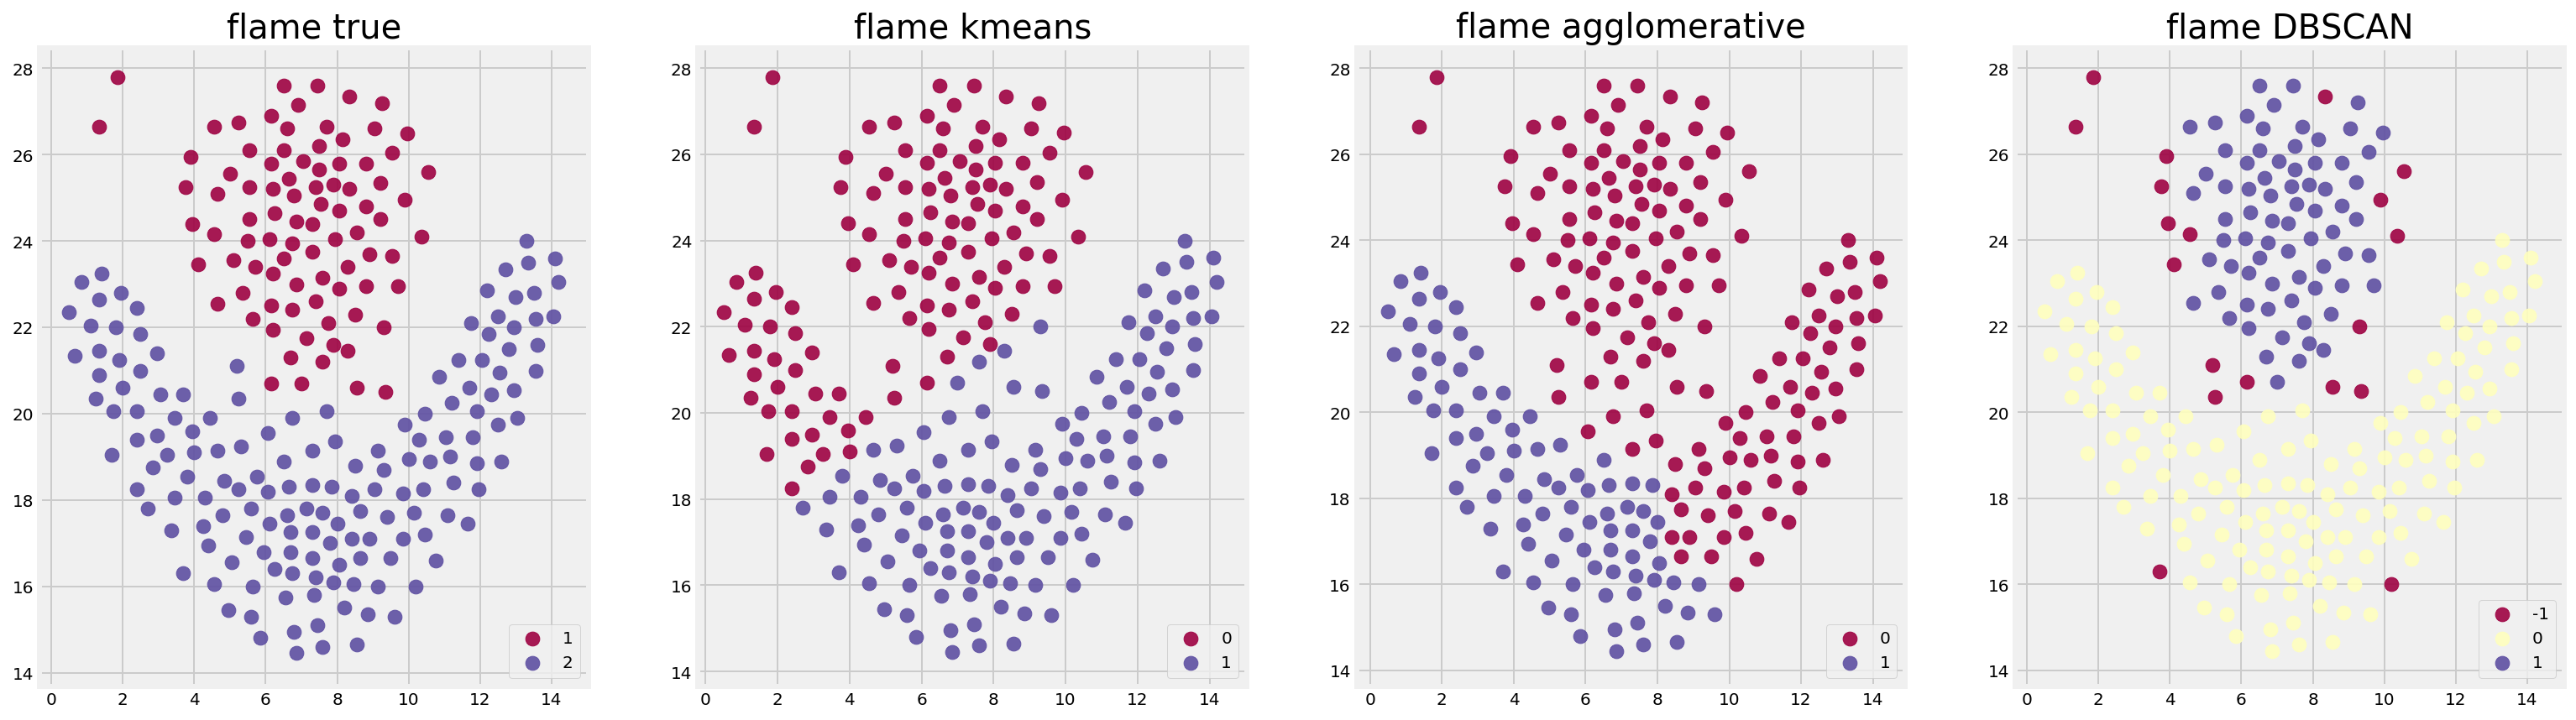

In [7]:
plot_competing_algos(flame, 'flame', n_clusters_kmeans=2, n_clusters_agg=2,
                     dbscan_eps=0.8, dbscan_min_samples=3)

---

### 4.2 Find good parameters for the `agg` dataset

Which algorithm (visually) performs best?

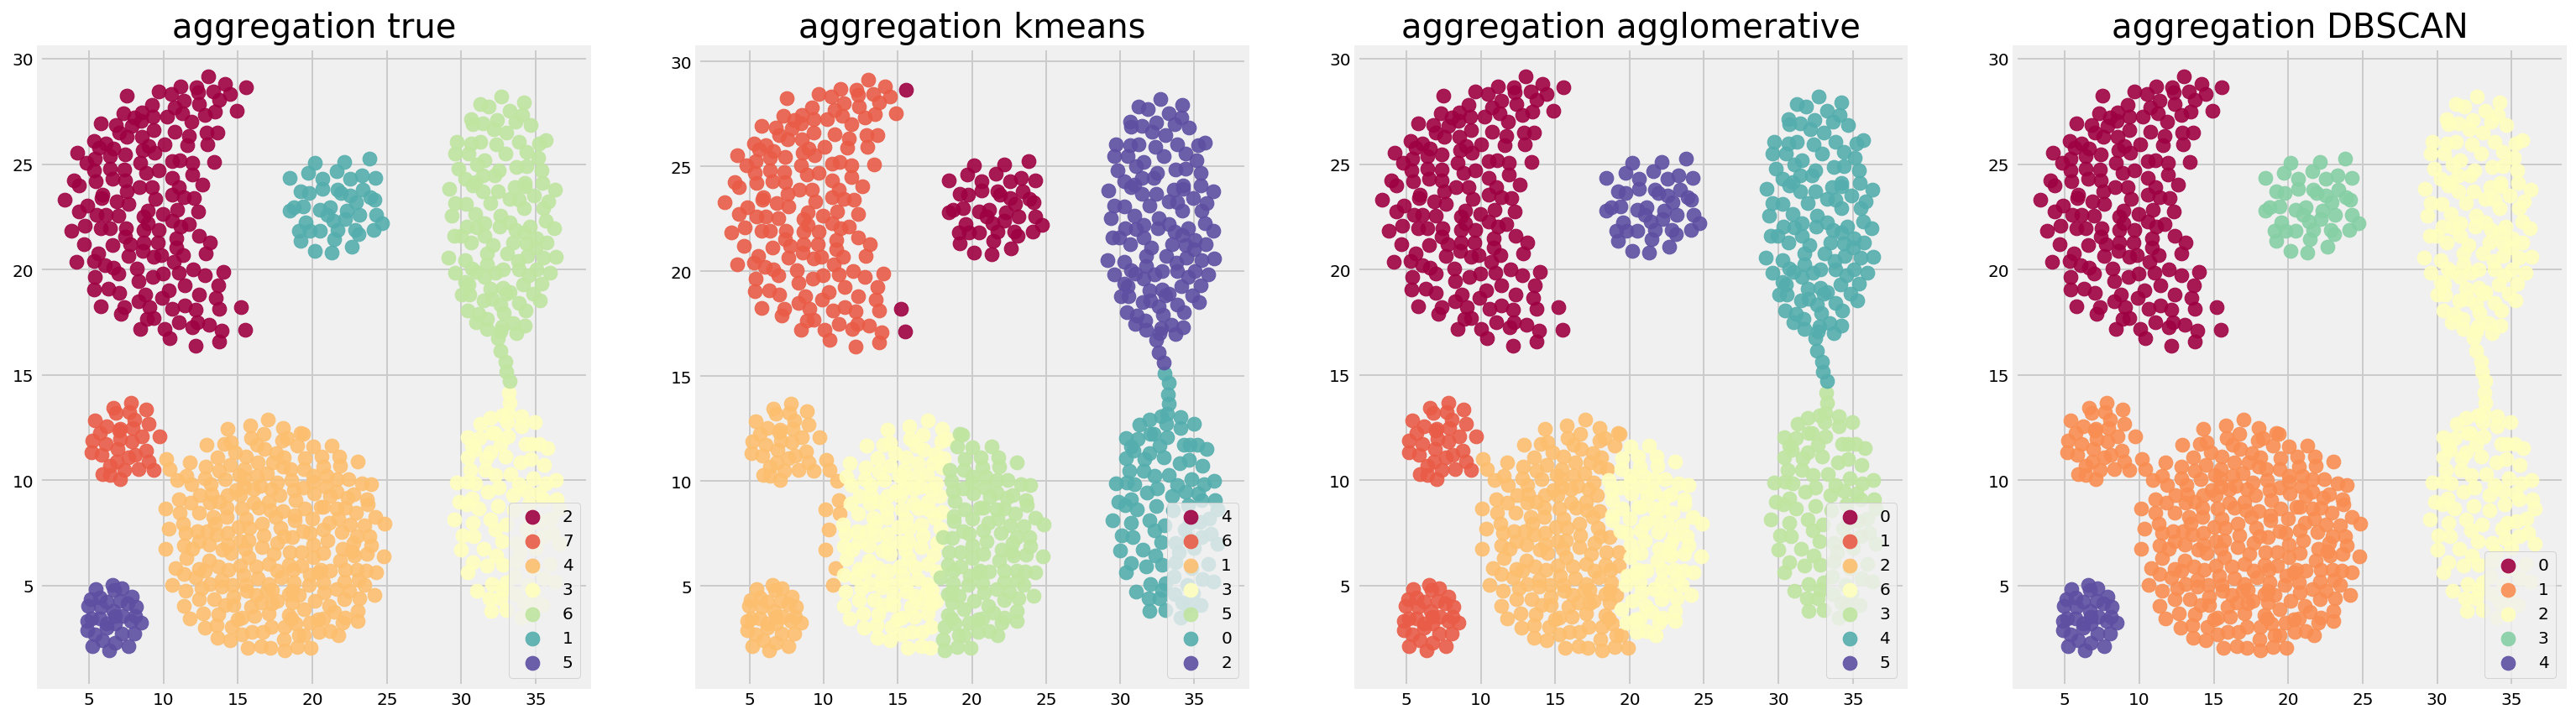

In [8]:
plot_competing_algos(agg, 'aggregation', n_clusters_kmeans=7, n_clusters_agg=7,
                     dbscan_eps=2, dbscan_min_samples=5)

---

### 4.3 Find good parameters for the `comp` dataset

Which algorithm (visually) performs best?

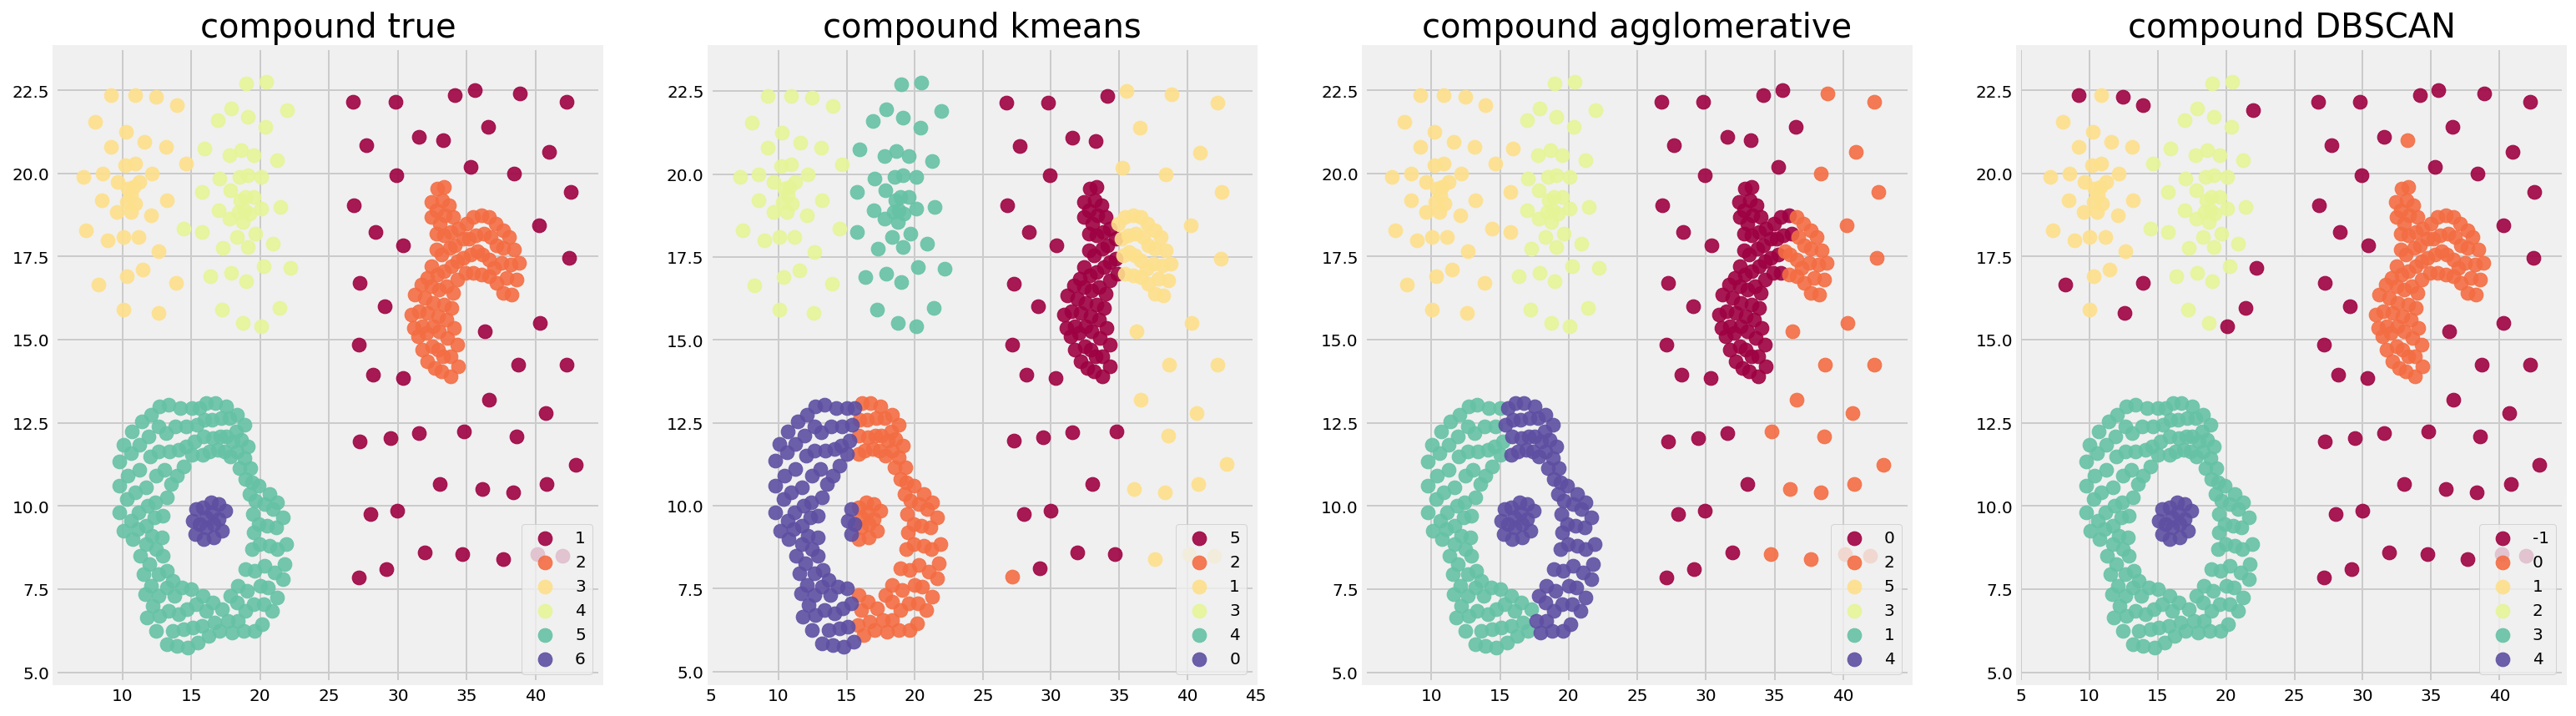

In [9]:
plot_competing_algos(comp, 'compound', n_clusters_kmeans=6, n_clusters_agg=6,
                     dbscan_eps=1.5, dbscan_min_samples=4)

---

### 4.4 Find good parameters for the `jain` dataset

Which algorithm (visually) performs best?

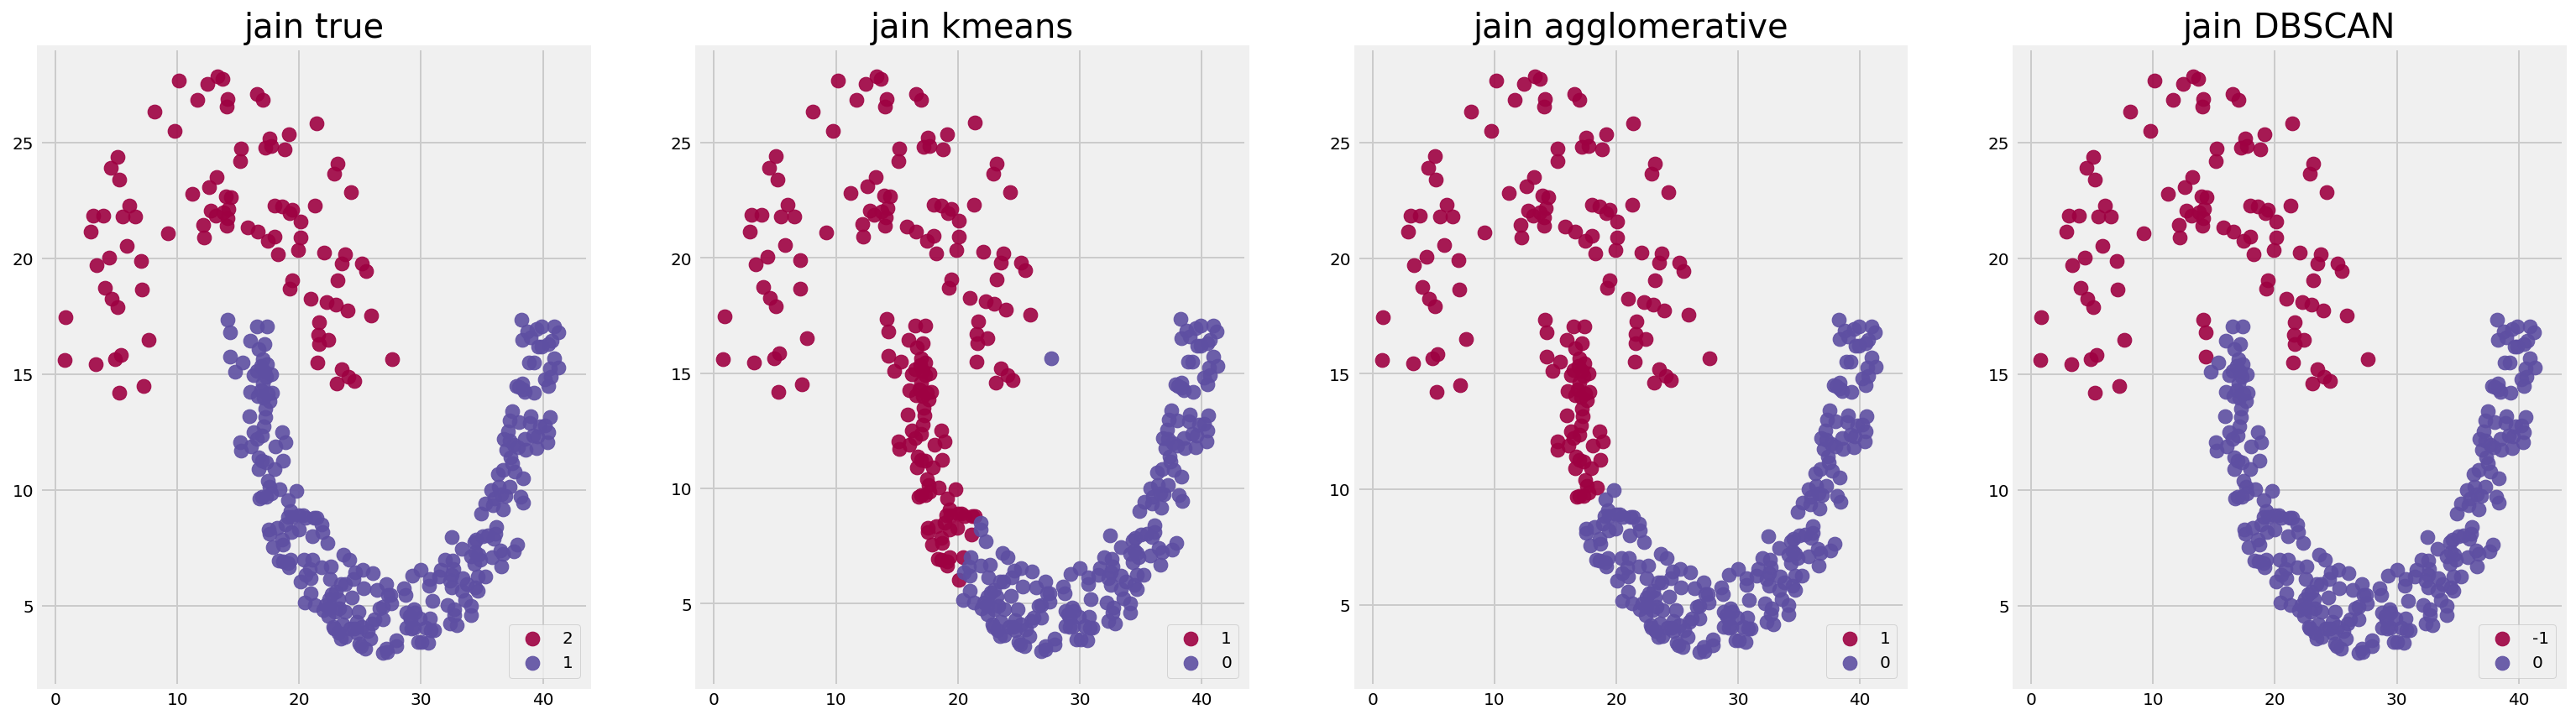

In [10]:
plot_competing_algos(jain, 'jain', n_clusters_kmeans=2, n_clusters_agg=2,
                     dbscan_eps=1.7, dbscan_min_samples=13)

---

### 4.5 Find good parameters for the `pathbased` dataset

Which algorithm (visually) performs best?

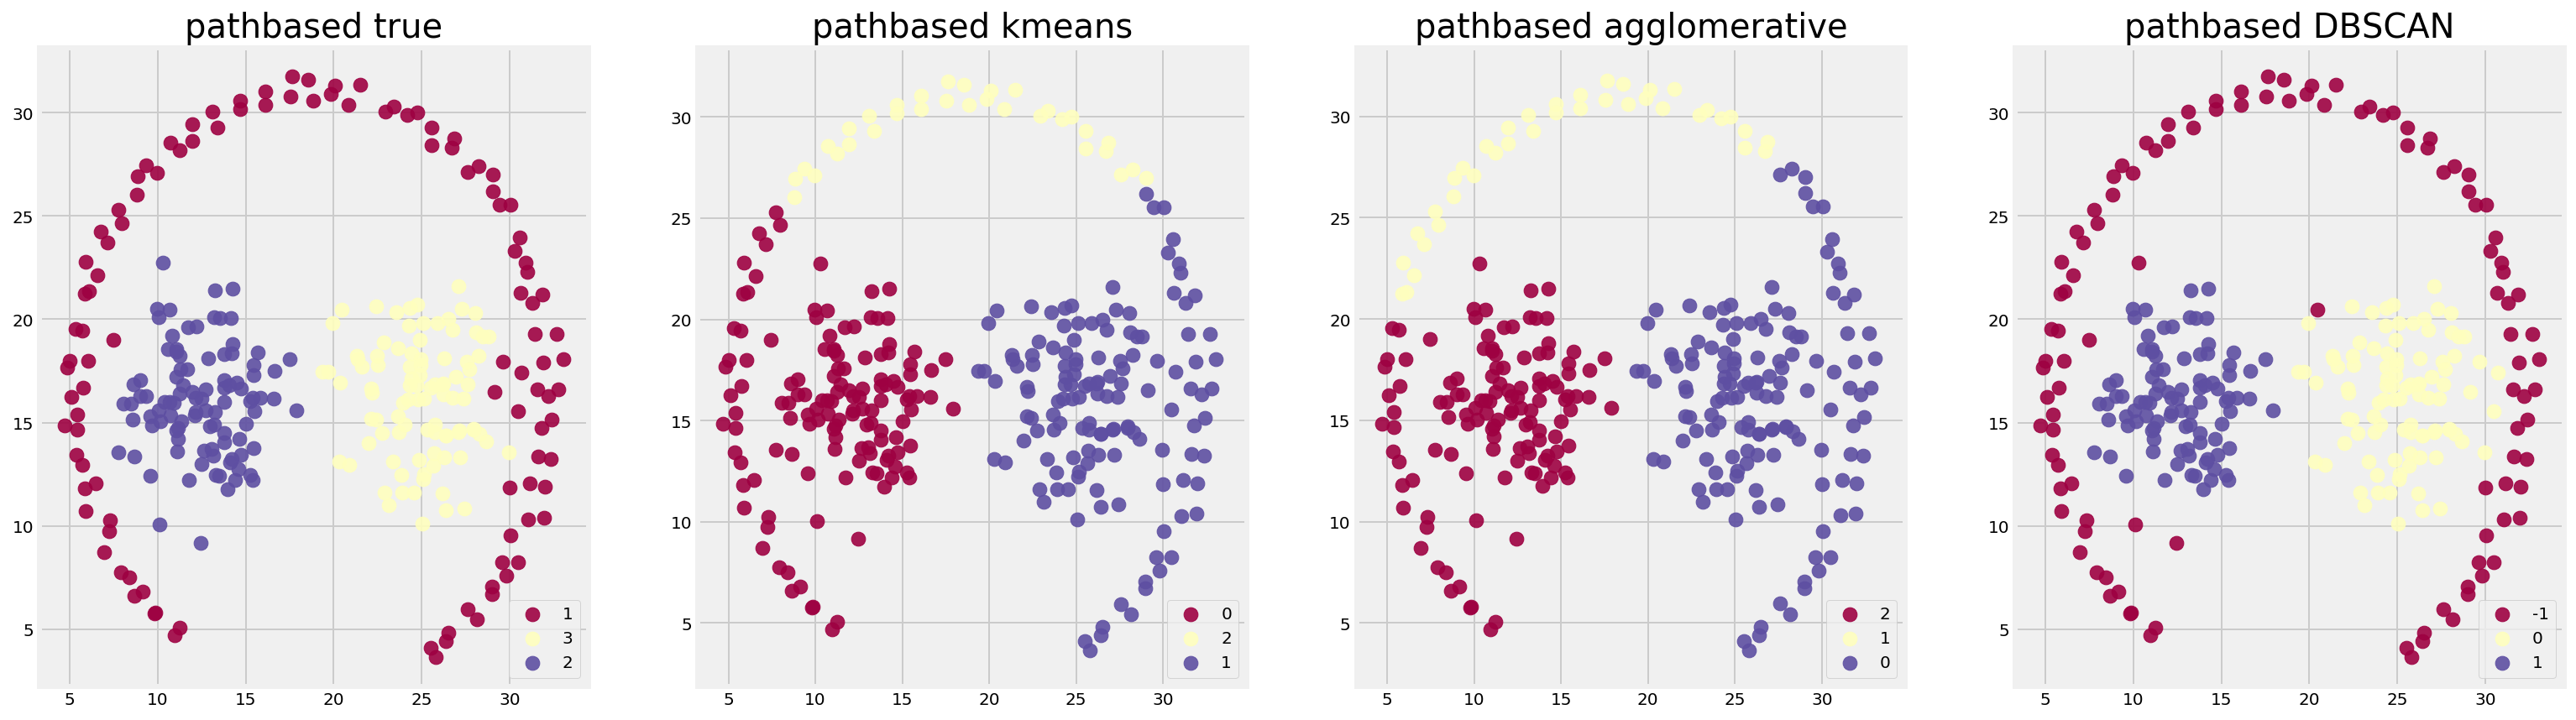

In [11]:
plot_competing_algos(path, 'pathbased', n_clusters_kmeans=3, n_clusters_agg=3,
                     dbscan_eps=2.25, dbscan_min_samples=10)

---

### 4.6 Find good parameters for the `r15` dataset

Which algorithm (visually) performs best?

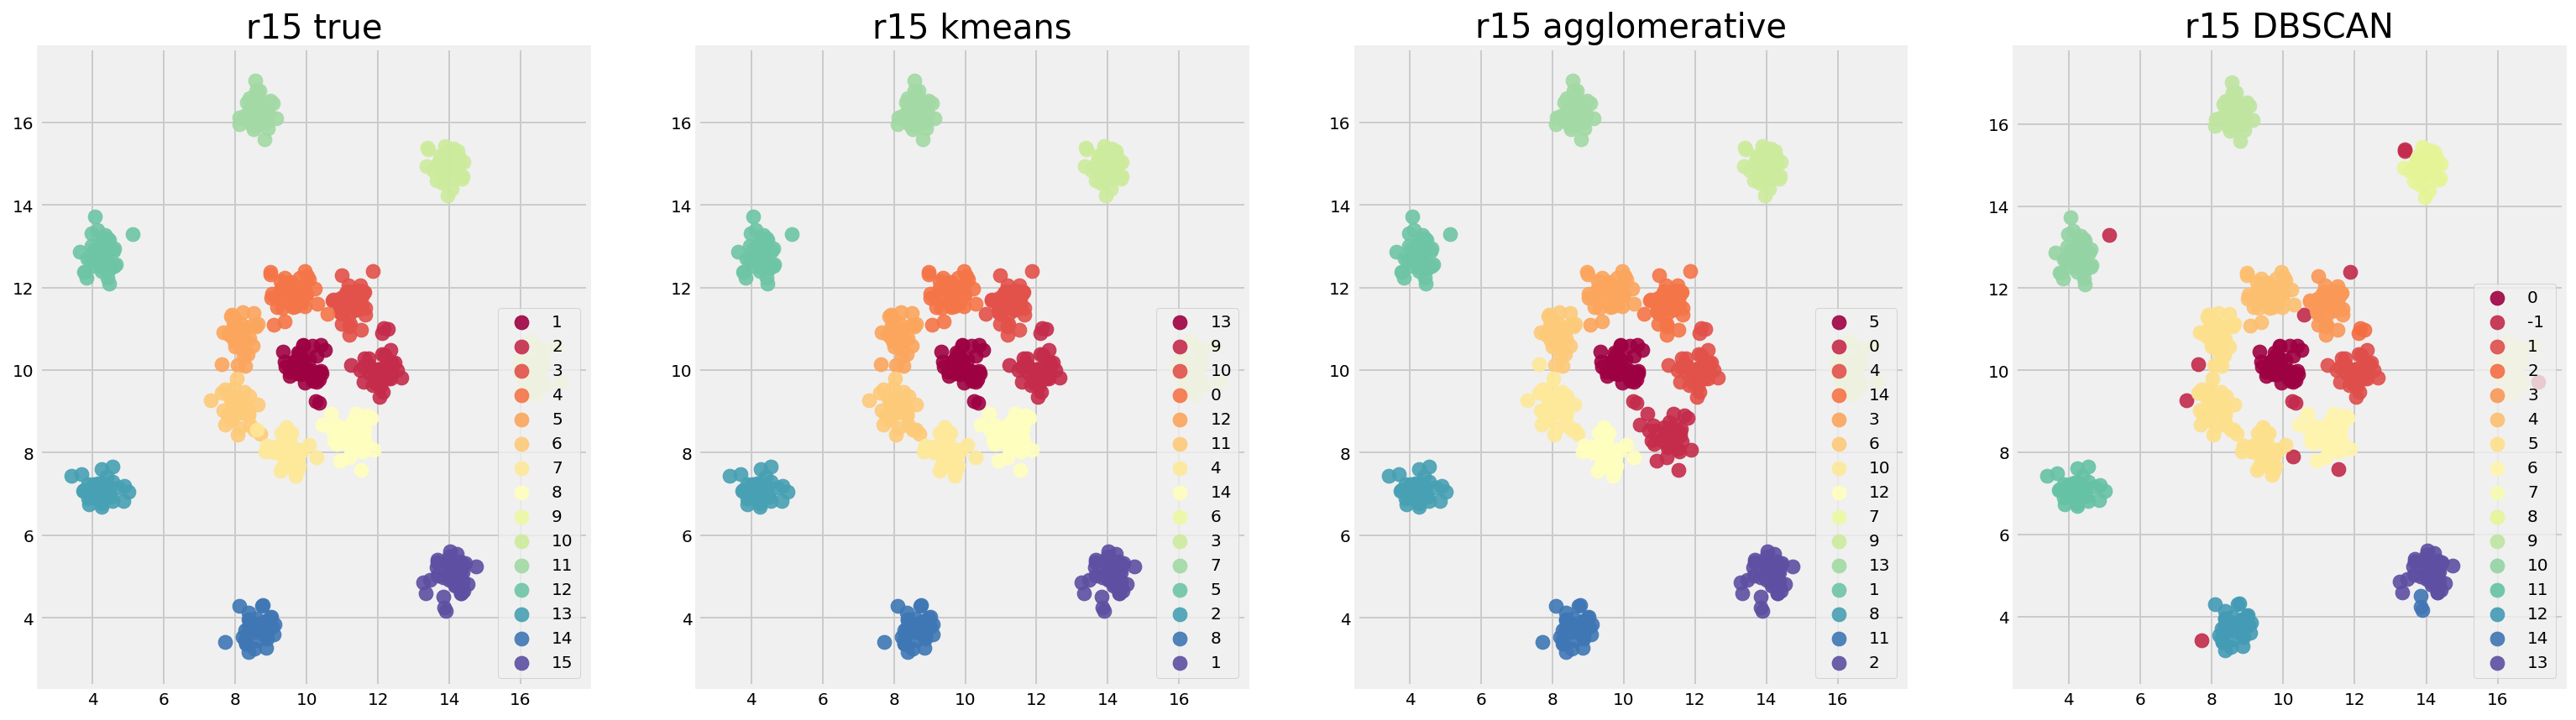

In [12]:
plot_competing_algos(r15, 'r15', n_clusters_kmeans=15, n_clusters_agg=15,
                     dbscan_eps=0.35, dbscan_min_samples=3)

---

### 4.7 Find good parameters for the `spiral` dataset

Which algorithm (visually) performs best?

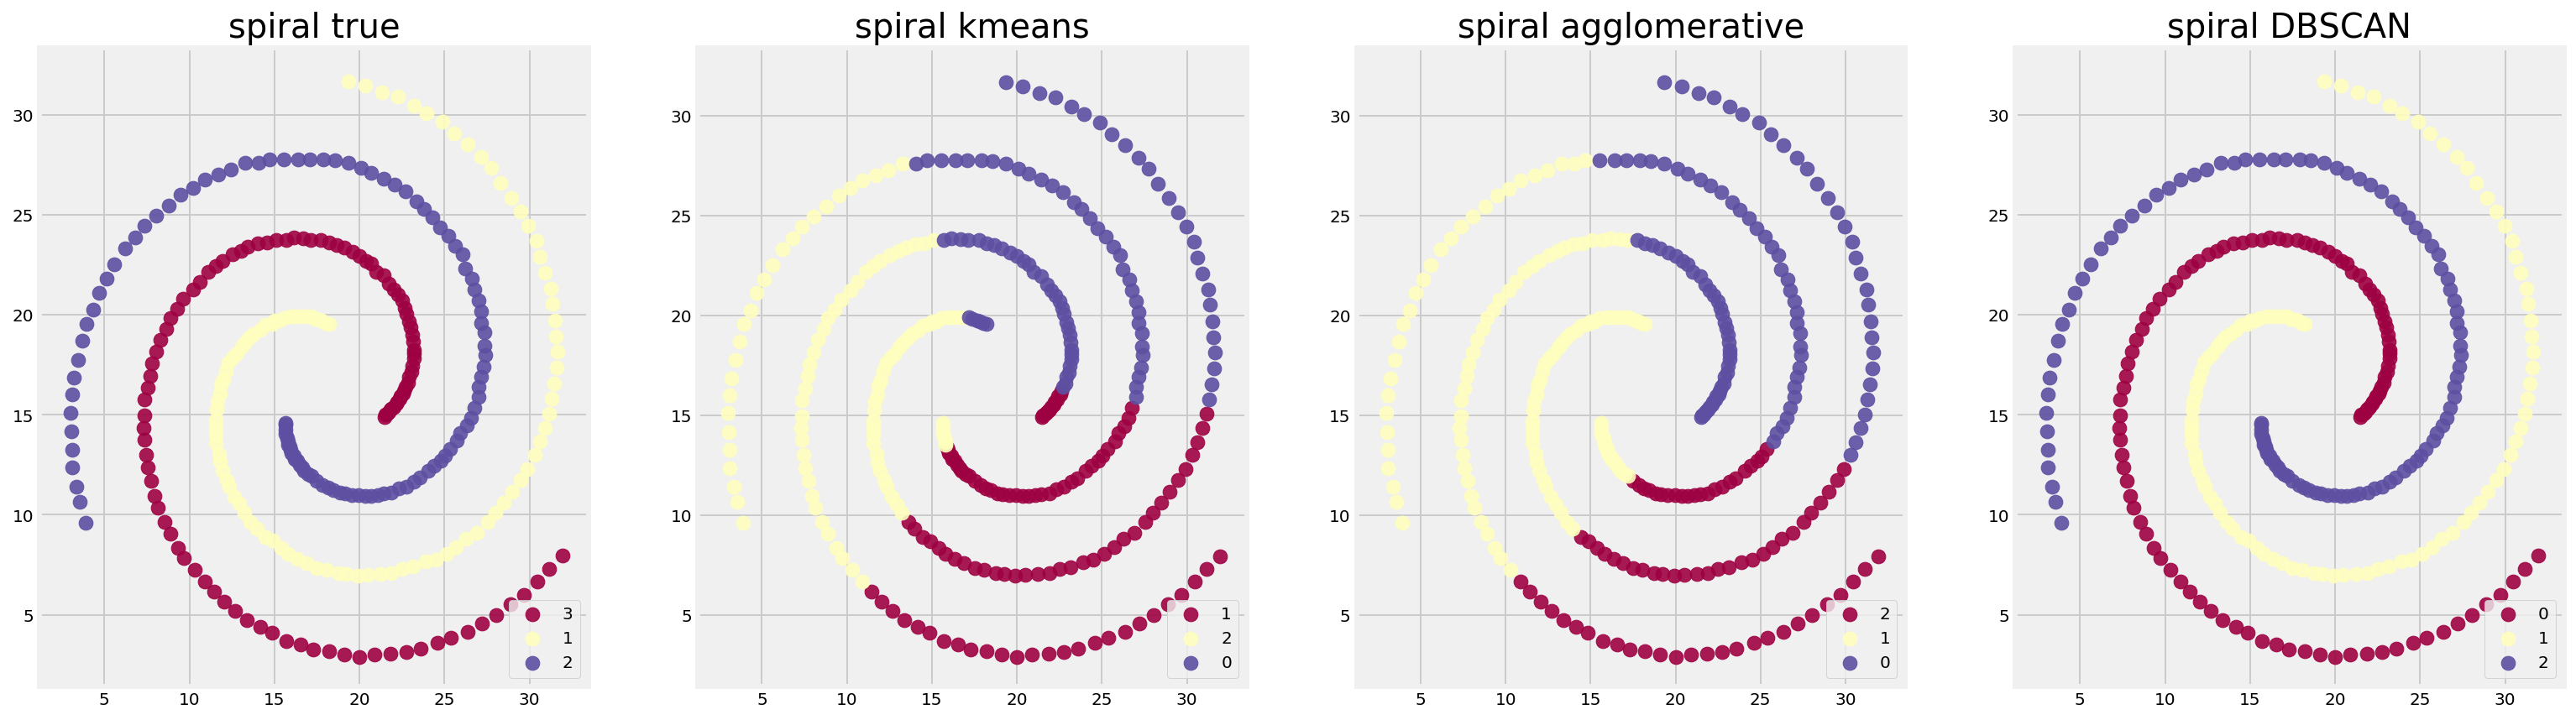

In [13]:
plot_competing_algos(spiral, 'spiral', n_clusters_kmeans=3, n_clusters_agg=3,
                     dbscan_eps=3, dbscan_min_samples=5)